In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importation des données

In [1]:

def import_json(file_path):
    if not os.path.exists(file_path):
        print(f"Le fichier {file_path} est introuvable. Veuillez vérifier le chemin.")
    else:
        try:
            data = pd.read_json(file_path)
            print("Fichier JSON lu avec succès.")
            return data
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier JSON : {e}")
            return None

In [9]:
def format_data(data):
    def params_to_dict(params):
        result = {}
        i = 0
        while i < len(params):
            if i + 1 < len(params) and not params[i + 1].startswith('-'):
                result[params[i]] = params[i + 1]
                i += 2
            else:
                result[params[i]] = True
                i += 1
        return result

    param_dicts = data['params'].apply(params_to_dict)
    param_df = pd.DataFrame(param_dicts.tolist())
    data = pd.concat([data.drop(columns=['params']), param_df], axis=1)
    data = data.apply(pd.to_numeric, errors='ignore')
    
    return data

### Simple algorithme

In [10]:
file_path = "./data-simple-fractal/results.json" 
data = import_json(file_path)
data.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 1000, -w, 1000]",0.19,9.39,49.11
1,../fractal/fractal_simple,"[-h, 1000, -w, 1500]",0.26,12.78,48.90
2,../fractal/fractal_simple,"[-h, 1000, -w, 2000]",0.34,16.69,48.81
3,../fractal/fractal_simple,"[-h, 1000, -w, 2500]",0.42,20.62,48.93
4,../fractal/fractal_simple,"[-h, 1000, -w, 3000]",0.61,29.93,49.36


In [11]:
data = format_data(data)
data

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,0.19,9.39,49.11,1000,1000
1,../fractal/fractal_simple,0.26,12.78,48.90,1000,1500
2,../fractal/fractal_simple,0.34,16.69,48.81,1000,2000
3,../fractal/fractal_simple,0.42,20.62,48.93,1000,2500
4,../fractal/fractal_simple,0.61,29.93,49.36,1000,3000
...,...,...,...,...,...,...
356,../fractal/fractal_simple,15.43,753.29,48.82,10000,8000
357,../fractal/fractal_simple,16.50,810.81,49.13,10000,8500
358,../fractal/fractal_simple,17.43,866.40,49.70,10000,9000
359,../fractal/fractal_simple,18.34,894.49,48.76,10000,9500


### optimisation 1

In [12]:
file_path_opti1 = "./data-opti1-fractal/results.json" 
data_opti1 = import_json(file_path_opti1)
data_opti1.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.10,104.57,49.77
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.39,117.53,49.26
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.66,131.16,49.29
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.86,144.18,50.40
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.13,155.01,49.46


In [13]:
data_opti1 = format_data(data_opti1)
data_opti1

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.10,104.57,49.77,4500,4500,True
1,../fractal/fractal,2.39,117.53,49.26,4500,5000,True
2,../fractal/fractal,2.66,131.16,49.29,4500,5500,True
3,../fractal/fractal,2.86,144.18,50.40,4500,6000,True
4,../fractal/fractal,3.13,155.01,49.46,4500,6500,True
5,../fractal/fractal,3.37,165.72,49.20,4500,7000,True
6,../fractal/fractal,3.57,177.57,49.76,4500,7500,True
7,../fractal/fractal,2.40,122.07,50.78,5000,4500,True
8,../fractal/fractal,2.63,131.55,50.02,5000,5000,True
9,../fractal/fractal,2.89,142.08,49.13,5000,5500,True


### Optimisation2

In [14]:
file_path_opti2 = "./data-opti2-fractal/results.json" 
data_opti2 = import_json(file_path_opti2)
data_opti2.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.10,103.89,49.45
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.31,115.09,49.85
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.57,127.04,49.35
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.80,137.80,49.21
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.09,153.59,49.76


In [15]:
data_opti2 = format_data(data_opti2)
data_opti2

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.10,103.89,49.45,4500,4500,True
1,../fractal/fractal,2.31,115.09,49.85,4500,5000,True
2,../fractal/fractal,2.57,127.04,49.35,4500,5500,True
3,../fractal/fractal,2.80,137.80,49.21,4500,6000,True
4,../fractal/fractal,3.09,153.59,49.76,4500,6500,True
5,../fractal/fractal,3.31,162.19,48.97,4500,7000,True
6,../fractal/fractal,3.54,173.36,49.04,4500,7500,True
7,../fractal/fractal,2.41,117.59,48.70,5000,4500,True
8,../fractal/fractal,2.66,132.27,49.65,5000,5000,True
9,../fractal/fractal,2.93,147.17,50.18,5000,5500,True


### Optimisation3

In [16]:
file_path_opti3 = "./data-opti2-fractal/results.json" 
data_opti3 = import_json(file_path_opti3)
data_opti3.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.10,103.89,49.45
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.31,115.09,49.85
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.57,127.04,49.35
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.80,137.80,49.21
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.09,153.59,49.76


In [17]:
data_opti3 = format_data(data_opti3)
data_opti3

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.10,103.89,49.45,4500,4500,True
1,../fractal/fractal,2.31,115.09,49.85,4500,5000,True
2,../fractal/fractal,2.57,127.04,49.35,4500,5500,True
3,../fractal/fractal,2.80,137.80,49.21,4500,6000,True
4,../fractal/fractal,3.09,153.59,49.76,4500,6500,True
5,../fractal/fractal,3.31,162.19,48.97,4500,7000,True
6,../fractal/fractal,3.54,173.36,49.04,4500,7500,True
7,../fractal/fractal,2.41,117.59,48.70,5000,4500,True
8,../fractal/fractal,2.66,132.27,49.65,5000,5000,True
9,../fractal/fractal,2.93,147.17,50.18,5000,5500,True


### Optimisation4

In [18]:
file_path_opti4 = "./data-opti2-fractal/results.json"
data_opti4 = import_json(file_path_opti4)
data_opti4.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.10,103.89,49.45
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.31,115.09,49.85
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.57,127.04,49.35
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.80,137.80,49.21
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.09,153.59,49.76


In [19]:
data_opti4 = format_data(data_opti4)
data_opti4

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.10,103.89,49.45,4500,4500,True
1,../fractal/fractal,2.31,115.09,49.85,4500,5000,True
2,../fractal/fractal,2.57,127.04,49.35,4500,5500,True
3,../fractal/fractal,2.80,137.80,49.21,4500,6000,True
4,../fractal/fractal,3.09,153.59,49.76,4500,6500,True
5,../fractal/fractal,3.31,162.19,48.97,4500,7000,True
6,../fractal/fractal,3.54,173.36,49.04,4500,7500,True
7,../fractal/fractal,2.41,117.59,48.70,5000,4500,True
8,../fractal/fractal,2.66,132.27,49.65,5000,5000,True
9,../fractal/fractal,2.93,147.17,50.18,5000,5500,True


# Analyse des données

## Premier aperçu

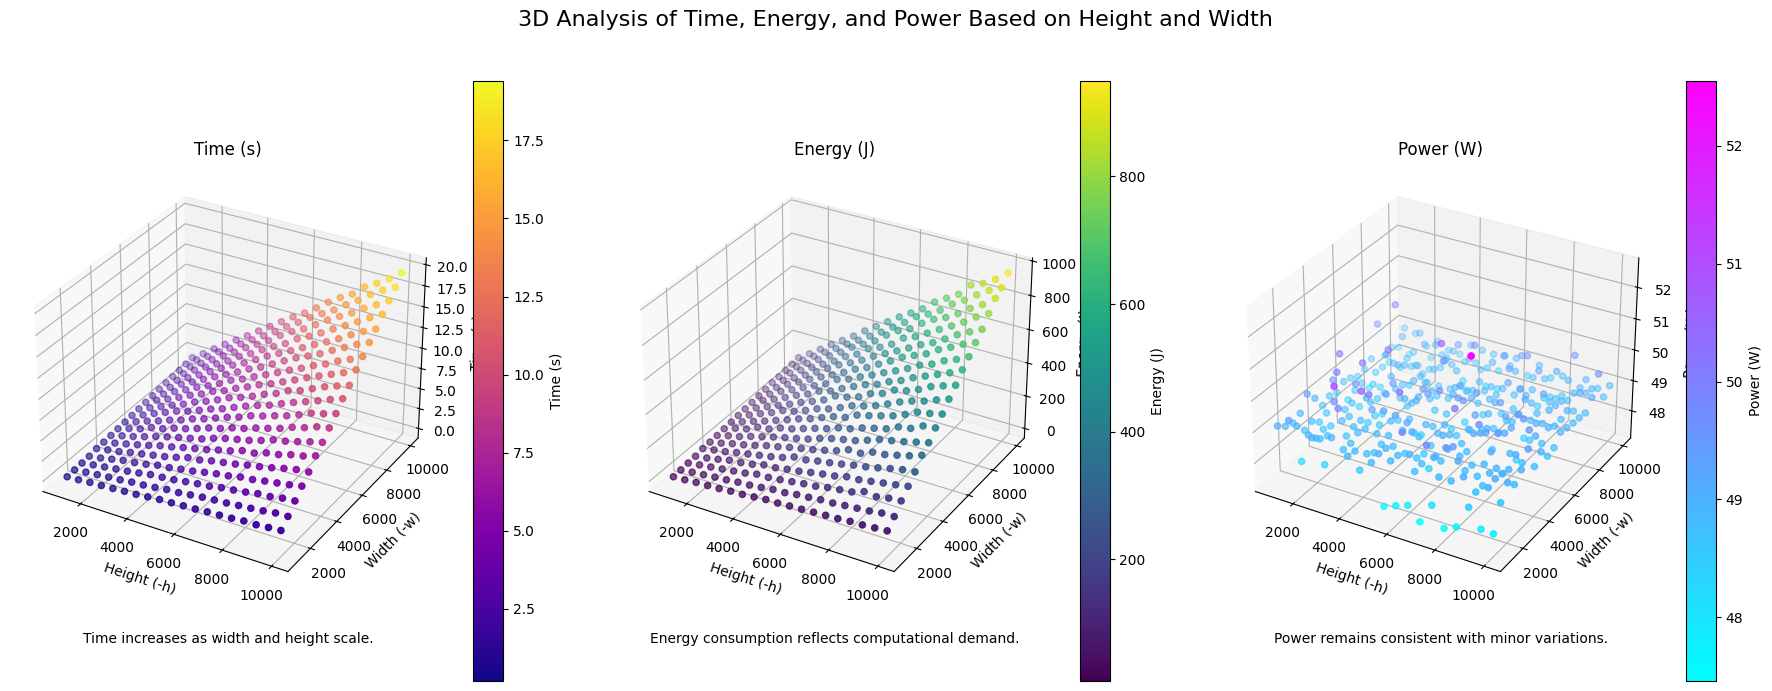

In [20]:
fig = plt.figure(figsize=(18, 7))
fig.suptitle('3D Analysis of Time, Energy, and Power Based on Height and Width', fontsize=16)

ax1 = fig.add_subplot(131, projection='3d')
sc_time = ax1.scatter(data['-h'], data['-w'], data['time'], c=data['time'], cmap='plasma', label='Time')
ax1.set_title('Time (s)')
ax1.set_xlabel('Height (-h)')
ax1.set_ylabel('Width (-w)')
ax1.set_zlabel('Time (s)')
plt.colorbar(sc_time, ax=ax1, label='Time (s)')
ax1.text2D(0.5, -0.1, "Time increases as width and height scale.", transform=ax1.transAxes, fontsize=10, ha='center')

ax2 = fig.add_subplot(132, projection='3d')
sc_energy = ax2.scatter(data['-h'], data['-w'], data['energy'], c=data['energy'], cmap='viridis', label='Energy')
ax2.set_title('Energy (J)')
ax2.set_xlabel('Height (-h)')
ax2.set_ylabel('Width (-w)')
ax2.set_zlabel('Energy (J)')
plt.colorbar(sc_energy, ax=ax2, label='Energy (J)')
ax2.text2D(0.5, -0.1, "Energy consumption reflects computational demand.", transform=ax2.transAxes, fontsize=10, ha='center')

ax3 = fig.add_subplot(133, projection='3d')
sc_power = ax3.scatter(data['-h'], data['-w'], data['power'], c=data['power'], cmap='cool', label='Power')
ax3.set_title('Power (W)')
ax3.set_xlabel('Height (-h)')
ax3.set_ylabel('Width (-w)')
ax3.set_zlabel('Power (W)')
plt.colorbar(sc_power, ax=ax3, label='Power (W)')
ax3.text2D(0.5, -0.1, "Power remains consistent with minor variations.", transform=ax3.transAxes, fontsize=10, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Introduction de l’Indicateur : Energy-Delay Product (EDP)

Pour évaluer les performances de nos différentes implémentations, nous proposons d’utiliser un indicateur combinant à la fois le temps d’exécution et l’énergie consommée. Une métrique couramment utilisée dans le domaine des systèmes et de l’informatique verte est le **Energy-Delay Product (EDP)**.

**Définition :**  

$$
\text{EDP} = \text{Temps d’exécution} \times \text{Énergie consommée}
$$

- Le temps d’exécution est généralement exprimé en secondes.
- L’énergie consommée, dans notre cas, est en Joules.

En réduisant simultanément le temps et la consommation, un EDP plus faible signifie une meilleure performance globale.

In [21]:
data['EDP'] = data['time'] * data['energy']
data_opti1['EDP'] = data_opti1['time'] * data_opti1['energy']
data_opti2['EDP'] = data_opti2['time'] * data_opti2['energy']
data_opti3['EDP'] = data_opti3['time'] * data_opti3['energy']
data_opti4['EDP'] = data_opti4['time'] * data_opti4['energy']

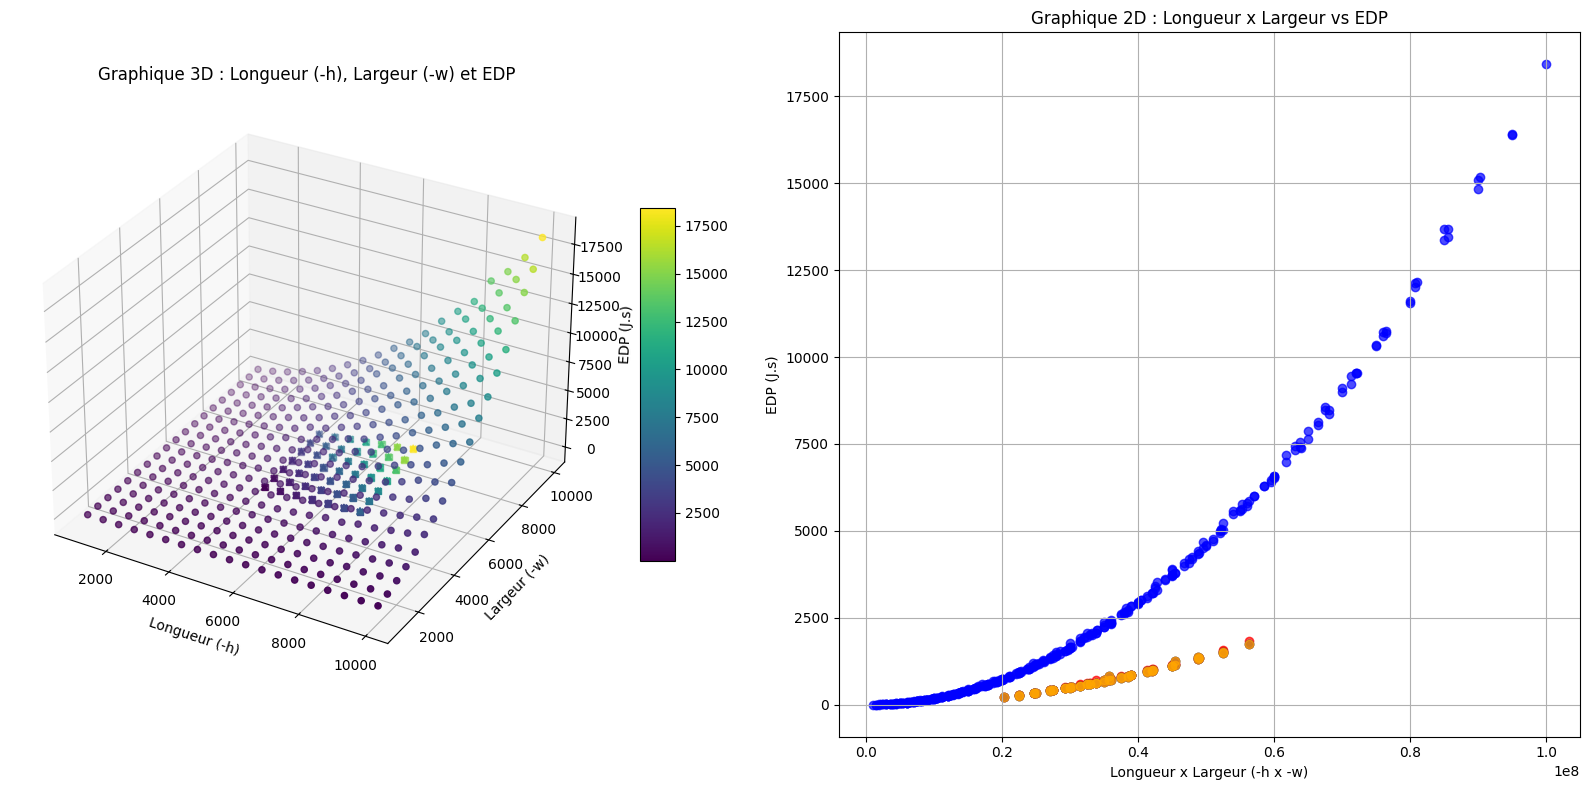

In [23]:
fig = plt.figure(figsize=(16, 8))

ax_3d = fig.add_subplot(121, projection='3d')
scatter = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c=data['EDP'], cmap='viridis', marker='o')
sc_opti1 = ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c=data_opti1['EDP'], cmap='viridis', marker='^')
sc_opti2 = ax_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['EDP'], c=data_opti2['EDP'], cmap='viridis', marker='s')
sc_opti3 = ax_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['EDP'], c=data_opti3['EDP'], cmap='viridis', marker='x')
sc_opti4 = ax_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['EDP'], c=data_opti4['EDP'], cmap='viridis', marker='*')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
fig.colorbar(scatter, ax=ax_3d, shrink=0.5, aspect=10)

ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='blue', alpha=0.7)
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='red', alpha=0.7)
ax_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['EDP'], c='green', alpha=0.7)
ax_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['EDP'], c='purple', alpha=0.7)
ax_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['EDP'], c='orange', alpha=0.7)
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)

plt.tight_layout()
plt.show()
